# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

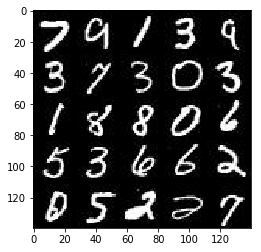

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

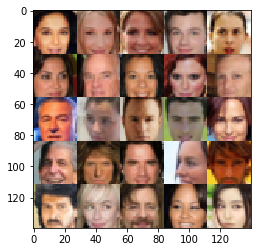

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_images")
    z_data = tf.placeholder(tf.float32, (None, z_dim), name="z_data")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    return input_images, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [21]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        # conv 1
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        #leaky ReLu
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x32
        
        # conv 2
        # 7x7x128
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, strides=2, padding='same')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        # conv 3
        # 4x4x256 
        conv3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding='same')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        

        # Flatten
        flat = tf.reshape(lrelu3, (-1, 4*4*256))
        # Logit
        logits = tf.layers.dense(flat, 1)
        #discriminator output sigmoid(probility output)
        out = tf.sigmoid(logits)

        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [22]:

def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # fully connected layer
        fc = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
#         fc = tf.layers.batch_normalization(fc, training=is_train)
        fc = tf.reshape(fc, (-1, 2, 2, 512))
        fc = tf.maximum(alpha * fc, fc)
        # 4x4x512 now
        
        deconv2 = tf.layers.conv2d_transpose(fc, 256, 5, strides=2, padding='valid')
        deconv2 = tf.layers.batch_normalization(deconv2, training=is_train)
        deconv2 = tf.maximum(alpha * deconv2, deconv2)
        # 16x16x256 now
        
        deconv3 = tf.layers.conv2d_transpose(deconv2, 128, 5, strides=2, padding='same')
        deconv3 = tf.layers.batch_normalization(deconv3, training=is_train)
        deconv3 = tf.maximum(alpha * deconv3, deconv3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(deconv3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        #output Tanh
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [23]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [24]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()


### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [26]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 25
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.0027... Generator Loss: 7.0372
Epoch 0/2... Discriminator Loss: 0.0103... Generator Loss: 5.9494
Epoch 0/2... Discriminator Loss: 0.1971... Generator Loss: 21.3633
Epoch 0/2... Discriminator Loss: 7.6001... Generator Loss: 0.0017
Epoch 0/2... Discriminator Loss: 0.3048... Generator Loss: 1.7483
Epoch 0/2... Discriminator Loss: 1.1475... Generator Loss: 0.6777
Epoch 0/2... Discriminator Loss: 2.1517... Generator Loss: 0.3240
Epoch 0/2... Discriminator Loss: 1.6793... Generator Loss: 0.9834
Epoch 0/2... Discriminator Loss: 0.2733... Generator Loss: 2.6262


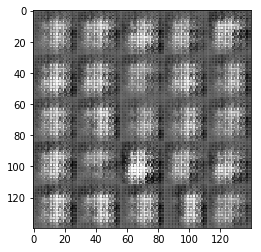

Epoch 0/2... Discriminator Loss: 0.6632... Generator Loss: 1.0301
Epoch 0/2... Discriminator Loss: 0.4764... Generator Loss: 3.7550
Epoch 0/2... Discriminator Loss: 0.3985... Generator Loss: 1.9482
Epoch 0/2... Discriminator Loss: 0.2242... Generator Loss: 3.5728
Epoch 0/2... Discriminator Loss: 1.6843... Generator Loss: 14.6864
Epoch 0/2... Discriminator Loss: 0.4216... Generator Loss: 1.9772
Epoch 0/2... Discriminator Loss: 0.3431... Generator Loss: 3.6719
Epoch 0/2... Discriminator Loss: 0.1537... Generator Loss: 3.0395
Epoch 0/2... Discriminator Loss: 0.1096... Generator Loss: 3.3658
Epoch 0/2... Discriminator Loss: 0.2899... Generator Loss: 3.6366


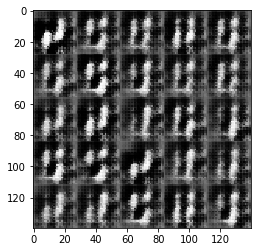

Epoch 0/2... Discriminator Loss: 0.7152... Generator Loss: 7.4401
Epoch 0/2... Discriminator Loss: 0.3695... Generator Loss: 2.5873
Epoch 0/2... Discriminator Loss: 0.1164... Generator Loss: 3.0889
Epoch 0/2... Discriminator Loss: 0.1411... Generator Loss: 3.0758
Epoch 0/2... Discriminator Loss: 0.1336... Generator Loss: 2.6848
Epoch 0/2... Discriminator Loss: 0.3593... Generator Loss: 1.8227
Epoch 0/2... Discriminator Loss: 0.1976... Generator Loss: 3.1616
Epoch 0/2... Discriminator Loss: 0.7034... Generator Loss: 5.8725
Epoch 0/2... Discriminator Loss: 0.2220... Generator Loss: 2.7779
Epoch 0/2... Discriminator Loss: 0.1816... Generator Loss: 3.1028


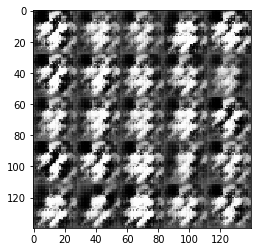

Epoch 0/2... Discriminator Loss: 0.2163... Generator Loss: 5.8593
Epoch 0/2... Discriminator Loss: 0.1792... Generator Loss: 4.0012
Epoch 0/2... Discriminator Loss: 0.0972... Generator Loss: 3.1288
Epoch 0/2... Discriminator Loss: 0.3315... Generator Loss: 4.5917
Epoch 0/2... Discriminator Loss: 0.2000... Generator Loss: 2.8281
Epoch 0/2... Discriminator Loss: 0.2873... Generator Loss: 2.5895
Epoch 0/2... Discriminator Loss: 0.3397... Generator Loss: 1.7213
Epoch 0/2... Discriminator Loss: 0.4677... Generator Loss: 2.7985
Epoch 0/2... Discriminator Loss: 0.1317... Generator Loss: 3.3667
Epoch 0/2... Discriminator Loss: 0.4289... Generator Loss: 2.0199


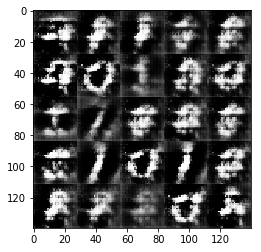

Epoch 0/2... Discriminator Loss: 0.1872... Generator Loss: 2.7109
Epoch 0/2... Discriminator Loss: 0.3327... Generator Loss: 2.6156
Epoch 0/2... Discriminator Loss: 0.6042... Generator Loss: 1.2730
Epoch 0/2... Discriminator Loss: 0.7911... Generator Loss: 4.5894
Epoch 0/2... Discriminator Loss: 0.6077... Generator Loss: 1.8064
Epoch 0/2... Discriminator Loss: 0.4736... Generator Loss: 4.1231
Epoch 0/2... Discriminator Loss: 0.8894... Generator Loss: 0.9241
Epoch 0/2... Discriminator Loss: 0.7853... Generator Loss: 4.5195
Epoch 0/2... Discriminator Loss: 0.4914... Generator Loss: 1.5164
Epoch 0/2... Discriminator Loss: 0.5278... Generator Loss: 1.7245


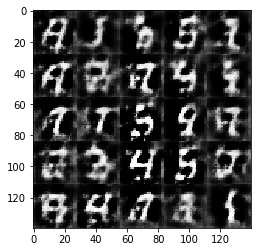

Epoch 0/2... Discriminator Loss: 0.4661... Generator Loss: 1.8447
Epoch 0/2... Discriminator Loss: 0.9959... Generator Loss: 0.7389
Epoch 0/2... Discriminator Loss: 0.7758... Generator Loss: 1.0251
Epoch 0/2... Discriminator Loss: 0.5098... Generator Loss: 1.7690
Epoch 0/2... Discriminator Loss: 0.6029... Generator Loss: 1.3694
Epoch 0/2... Discriminator Loss: 0.8584... Generator Loss: 1.1670
Epoch 0/2... Discriminator Loss: 0.5509... Generator Loss: 2.0061
Epoch 0/2... Discriminator Loss: 0.5336... Generator Loss: 1.9591
Epoch 0/2... Discriminator Loss: 0.9753... Generator Loss: 3.9595
Epoch 0/2... Discriminator Loss: 1.0258... Generator Loss: 3.0621


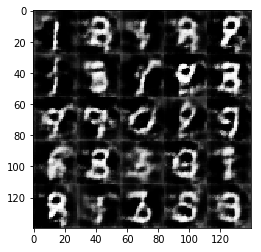

Epoch 0/2... Discriminator Loss: 0.6147... Generator Loss: 1.5108
Epoch 0/2... Discriminator Loss: 0.7171... Generator Loss: 1.0891
Epoch 0/2... Discriminator Loss: 0.8045... Generator Loss: 1.0059
Epoch 0/2... Discriminator Loss: 0.8721... Generator Loss: 0.9656
Epoch 0/2... Discriminator Loss: 0.5361... Generator Loss: 1.8392
Epoch 0/2... Discriminator Loss: 0.7074... Generator Loss: 1.5736
Epoch 0/2... Discriminator Loss: 0.7244... Generator Loss: 1.0350
Epoch 0/2... Discriminator Loss: 0.7464... Generator Loss: 1.4090
Epoch 0/2... Discriminator Loss: 0.7381... Generator Loss: 1.4278
Epoch 0/2... Discriminator Loss: 0.9572... Generator Loss: 0.9379


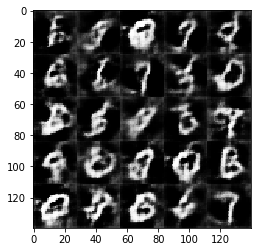

Epoch 0/2... Discriminator Loss: 0.6735... Generator Loss: 1.2525
Epoch 0/2... Discriminator Loss: 0.8746... Generator Loss: 0.9348
Epoch 0/2... Discriminator Loss: 0.4888... Generator Loss: 2.1716
Epoch 0/2... Discriminator Loss: 0.7786... Generator Loss: 0.9390
Epoch 0/2... Discriminator Loss: 0.7287... Generator Loss: 1.3917
Epoch 0/2... Discriminator Loss: 0.6572... Generator Loss: 1.7188
Epoch 0/2... Discriminator Loss: 0.6062... Generator Loss: 1.5188
Epoch 0/2... Discriminator Loss: 0.7496... Generator Loss: 2.3444
Epoch 0/2... Discriminator Loss: 0.8508... Generator Loss: 2.4347
Epoch 0/2... Discriminator Loss: 0.7669... Generator Loss: 0.9700


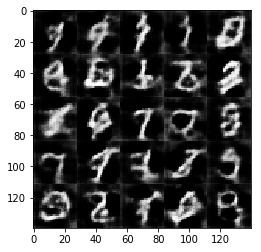

Epoch 0/2... Discriminator Loss: 0.8637... Generator Loss: 0.9386
Epoch 0/2... Discriminator Loss: 0.7079... Generator Loss: 2.4347
Epoch 0/2... Discriminator Loss: 0.6664... Generator Loss: 1.9597
Epoch 0/2... Discriminator Loss: 0.6568... Generator Loss: 1.9256
Epoch 0/2... Discriminator Loss: 0.6814... Generator Loss: 1.7616
Epoch 0/2... Discriminator Loss: 0.8036... Generator Loss: 2.0963
Epoch 0/2... Discriminator Loss: 1.0434... Generator Loss: 2.7294
Epoch 0/2... Discriminator Loss: 0.7926... Generator Loss: 1.0274
Epoch 0/2... Discriminator Loss: 0.8241... Generator Loss: 1.7866
Epoch 0/2... Discriminator Loss: 0.8124... Generator Loss: 1.0733


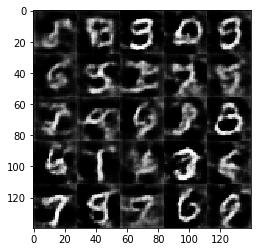

Epoch 0/2... Discriminator Loss: 0.7654... Generator Loss: 1.8092
Epoch 0/2... Discriminator Loss: 0.6582... Generator Loss: 1.7344
Epoch 0/2... Discriminator Loss: 1.0164... Generator Loss: 0.6470
Epoch 0/2... Discriminator Loss: 1.2751... Generator Loss: 0.4668
Epoch 1/2... Discriminator Loss: 0.8438... Generator Loss: 0.9109
Epoch 1/2... Discriminator Loss: 0.7662... Generator Loss: 1.0503
Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 2.1804
Epoch 1/2... Discriminator Loss: 0.9007... Generator Loss: 0.8173
Epoch 1/2... Discriminator Loss: 0.5857... Generator Loss: 1.4133
Epoch 1/2... Discriminator Loss: 0.6760... Generator Loss: 1.3430


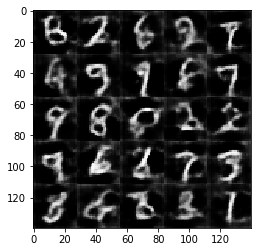

Epoch 1/2... Discriminator Loss: 1.0531... Generator Loss: 0.8428
Epoch 1/2... Discriminator Loss: 0.6854... Generator Loss: 1.7637
Epoch 1/2... Discriminator Loss: 0.6059... Generator Loss: 1.6464
Epoch 1/2... Discriminator Loss: 1.2161... Generator Loss: 0.5729
Epoch 1/2... Discriminator Loss: 0.8046... Generator Loss: 1.0600
Epoch 1/2... Discriminator Loss: 0.7120... Generator Loss: 1.4576
Epoch 1/2... Discriminator Loss: 0.8313... Generator Loss: 1.2717
Epoch 1/2... Discriminator Loss: 0.8778... Generator Loss: 0.9341
Epoch 1/2... Discriminator Loss: 0.7458... Generator Loss: 1.1119
Epoch 1/2... Discriminator Loss: 0.8882... Generator Loss: 0.8228


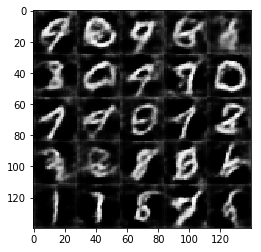

Epoch 1/2... Discriminator Loss: 0.6322... Generator Loss: 1.5839
Epoch 1/2... Discriminator Loss: 0.8982... Generator Loss: 2.7955
Epoch 1/2... Discriminator Loss: 0.6134... Generator Loss: 1.6057
Epoch 1/2... Discriminator Loss: 1.1231... Generator Loss: 2.2681
Epoch 1/2... Discriminator Loss: 0.6923... Generator Loss: 1.3896
Epoch 1/2... Discriminator Loss: 0.7125... Generator Loss: 1.1031
Epoch 1/2... Discriminator Loss: 0.6201... Generator Loss: 1.8244
Epoch 1/2... Discriminator Loss: 0.8666... Generator Loss: 0.8460
Epoch 1/2... Discriminator Loss: 0.9069... Generator Loss: 0.8393
Epoch 1/2... Discriminator Loss: 0.5715... Generator Loss: 1.1597


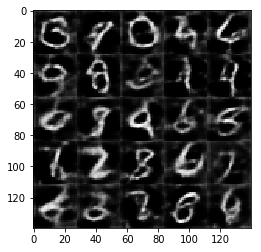

Epoch 1/2... Discriminator Loss: 0.8421... Generator Loss: 1.2212
Epoch 1/2... Discriminator Loss: 0.8430... Generator Loss: 2.0131
Epoch 1/2... Discriminator Loss: 0.6879... Generator Loss: 1.1085
Epoch 1/2... Discriminator Loss: 0.8784... Generator Loss: 2.0554
Epoch 1/2... Discriminator Loss: 0.7701... Generator Loss: 1.2722
Epoch 1/2... Discriminator Loss: 0.7190... Generator Loss: 1.0260
Epoch 1/2... Discriminator Loss: 0.5365... Generator Loss: 1.6977
Epoch 1/2... Discriminator Loss: 1.1515... Generator Loss: 0.5817
Epoch 1/2... Discriminator Loss: 0.6885... Generator Loss: 1.7437
Epoch 1/2... Discriminator Loss: 0.9035... Generator Loss: 0.7573


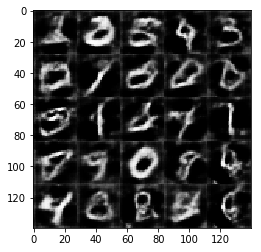

Epoch 1/2... Discriminator Loss: 0.6582... Generator Loss: 1.1025
Epoch 1/2... Discriminator Loss: 0.6970... Generator Loss: 1.9463
Epoch 1/2... Discriminator Loss: 0.5144... Generator Loss: 1.6602
Epoch 1/2... Discriminator Loss: 0.8658... Generator Loss: 0.7347
Epoch 1/2... Discriminator Loss: 0.6129... Generator Loss: 1.4873
Epoch 1/2... Discriminator Loss: 1.1139... Generator Loss: 1.7819
Epoch 1/2... Discriminator Loss: 0.8077... Generator Loss: 0.9435
Epoch 1/2... Discriminator Loss: 0.7303... Generator Loss: 1.1292
Epoch 1/2... Discriminator Loss: 1.4289... Generator Loss: 0.3837
Epoch 1/2... Discriminator Loss: 0.8903... Generator Loss: 0.7732


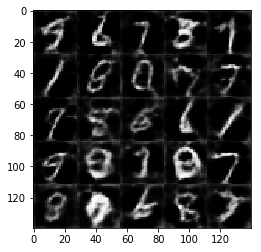

Epoch 1/2... Discriminator Loss: 0.9142... Generator Loss: 0.7253
Epoch 1/2... Discriminator Loss: 0.6977... Generator Loss: 0.9979
Epoch 1/2... Discriminator Loss: 0.9196... Generator Loss: 0.7179
Epoch 1/2... Discriminator Loss: 1.1148... Generator Loss: 0.6860
Epoch 1/2... Discriminator Loss: 0.8065... Generator Loss: 0.9853
Epoch 1/2... Discriminator Loss: 0.8427... Generator Loss: 0.8458
Epoch 1/2... Discriminator Loss: 0.6889... Generator Loss: 1.0575
Epoch 1/2... Discriminator Loss: 0.6778... Generator Loss: 1.4686
Epoch 1/2... Discriminator Loss: 0.8727... Generator Loss: 1.2436
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.7917


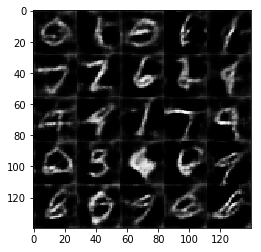

Epoch 1/2... Discriminator Loss: 0.6290... Generator Loss: 1.3530
Epoch 1/2... Discriminator Loss: 1.0107... Generator Loss: 0.6637
Epoch 1/2... Discriminator Loss: 0.9362... Generator Loss: 0.7440
Epoch 1/2... Discriminator Loss: 0.8459... Generator Loss: 1.0232
Epoch 1/2... Discriminator Loss: 0.9874... Generator Loss: 0.7923
Epoch 1/2... Discriminator Loss: 0.9453... Generator Loss: 0.7617
Epoch 1/2... Discriminator Loss: 1.2113... Generator Loss: 0.5610
Epoch 1/2... Discriminator Loss: 1.0509... Generator Loss: 0.6104
Epoch 1/2... Discriminator Loss: 1.1197... Generator Loss: 0.5395
Epoch 1/2... Discriminator Loss: 0.8330... Generator Loss: 2.1266


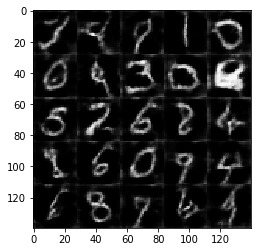

Epoch 1/2... Discriminator Loss: 1.0817... Generator Loss: 0.6321
Epoch 1/2... Discriminator Loss: 0.8636... Generator Loss: 0.8200
Epoch 1/2... Discriminator Loss: 1.0838... Generator Loss: 2.7590
Epoch 1/2... Discriminator Loss: 0.7418... Generator Loss: 0.9715
Epoch 1/2... Discriminator Loss: 0.5394... Generator Loss: 1.3621
Epoch 1/2... Discriminator Loss: 1.2209... Generator Loss: 0.4576
Epoch 1/2... Discriminator Loss: 1.0502... Generator Loss: 0.6150
Epoch 1/2... Discriminator Loss: 1.0177... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 0.6071... Generator Loss: 1.6135
Epoch 1/2... Discriminator Loss: 0.9377... Generator Loss: 0.7562


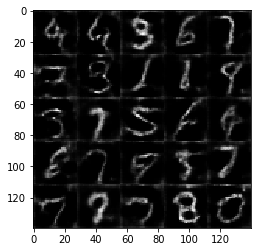

Epoch 1/2... Discriminator Loss: 1.3822... Generator Loss: 2.6996
Epoch 1/2... Discriminator Loss: 0.7218... Generator Loss: 1.2232
Epoch 1/2... Discriminator Loss: 0.9411... Generator Loss: 0.7384
Epoch 1/2... Discriminator Loss: 0.7601... Generator Loss: 0.9736
Epoch 1/2... Discriminator Loss: 0.8383... Generator Loss: 0.8853
Epoch 1/2... Discriminator Loss: 0.8821... Generator Loss: 0.7969
Epoch 1/2... Discriminator Loss: 0.7535... Generator Loss: 2.3043
Epoch 1/2... Discriminator Loss: 0.6116... Generator Loss: 1.2183
Epoch 1/2... Discriminator Loss: 0.5278... Generator Loss: 1.3534
Epoch 1/2... Discriminator Loss: 5.0668... Generator Loss: 0.0262


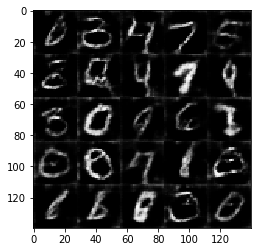

Epoch 1/2... Discriminator Loss: 0.7244... Generator Loss: 1.0808
Epoch 1/2... Discriminator Loss: 1.1597... Generator Loss: 0.5694
Epoch 1/2... Discriminator Loss: 1.1879... Generator Loss: 0.4877
Epoch 1/2... Discriminator Loss: 0.5849... Generator Loss: 1.4262
Epoch 1/2... Discriminator Loss: 0.8696... Generator Loss: 0.7507
Epoch 1/2... Discriminator Loss: 2.4474... Generator Loss: 0.1470
Epoch 1/2... Discriminator Loss: 0.8006... Generator Loss: 1.2097
Epoch 1/2... Discriminator Loss: 0.6496... Generator Loss: 1.9388


In [30]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, 
          batch_size, z_dim, 
          learning_rate, beta1, 
          mnist_dataset.get_batches,
          mnist_dataset.shape, 
          mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 4.1140... Generator Loss: 0.0212
Epoch 0/1... Discriminator Loss: 3.5638... Generator Loss: 0.0308
Epoch 0/1... Discriminator Loss: 1.6049... Generator Loss: 0.2339
Epoch 0/1... Discriminator Loss: 1.0232... Generator Loss: 0.4625
Epoch 0/1... Discriminator Loss: 0.2369... Generator Loss: 6.3442
Epoch 0/1... Discriminator Loss: 0.0721... Generator Loss: 2.7645
Epoch 0/1... Discriminator Loss: 0.4711... Generator Loss: 13.1532
Epoch 0/1... Discriminator Loss: 0.8003... Generator Loss: 2.3934
Epoch 0/1... Discriminator Loss: 1.0169... Generator Loss: 1.4395


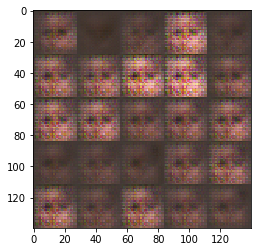

Epoch 0/1... Discriminator Loss: 1.3121... Generator Loss: 0.4531
Epoch 0/1... Discriminator Loss: 0.4159... Generator Loss: 2.2662
Epoch 0/1... Discriminator Loss: 0.3662... Generator Loss: 2.7654
Epoch 0/1... Discriminator Loss: 0.3672... Generator Loss: 2.0027
Epoch 0/1... Discriminator Loss: 0.2881... Generator Loss: 1.8893
Epoch 0/1... Discriminator Loss: 0.5483... Generator Loss: 2.1862
Epoch 0/1... Discriminator Loss: 0.4611... Generator Loss: 1.8965
Epoch 0/1... Discriminator Loss: 1.9028... Generator Loss: 0.2512
Epoch 0/1... Discriminator Loss: 0.9252... Generator Loss: 2.2212
Epoch 0/1... Discriminator Loss: 2.7366... Generator Loss: 6.8389


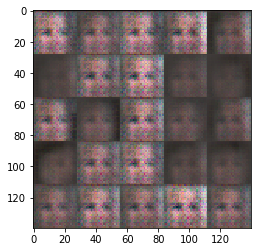

Epoch 0/1... Discriminator Loss: 0.4420... Generator Loss: 2.0286
Epoch 0/1... Discriminator Loss: 1.1013... Generator Loss: 1.1633
Epoch 0/1... Discriminator Loss: 1.1598... Generator Loss: 1.1613
Epoch 0/1... Discriminator Loss: 3.0646... Generator Loss: 0.1677
Epoch 0/1... Discriminator Loss: 1.3787... Generator Loss: 0.9504
Epoch 0/1... Discriminator Loss: 1.5903... Generator Loss: 0.8502
Epoch 0/1... Discriminator Loss: 1.3971... Generator Loss: 0.5848
Epoch 0/1... Discriminator Loss: 1.1041... Generator Loss: 1.3158
Epoch 0/1... Discriminator Loss: 0.7715... Generator Loss: 1.6989
Epoch 0/1... Discriminator Loss: 1.0499... Generator Loss: 1.2686


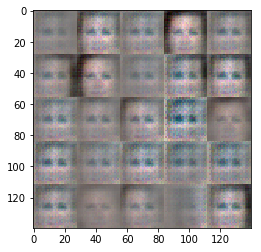

Epoch 0/1... Discriminator Loss: 0.8214... Generator Loss: 1.0061
Epoch 0/1... Discriminator Loss: 0.9214... Generator Loss: 1.2856
Epoch 0/1... Discriminator Loss: 0.8631... Generator Loss: 1.9627
Epoch 0/1... Discriminator Loss: 1.5883... Generator Loss: 0.7032
Epoch 0/1... Discriminator Loss: 0.6923... Generator Loss: 1.3417
Epoch 0/1... Discriminator Loss: 1.3088... Generator Loss: 0.8230
Epoch 0/1... Discriminator Loss: 0.8433... Generator Loss: 1.0107
Epoch 0/1... Discriminator Loss: 1.2243... Generator Loss: 0.6017
Epoch 0/1... Discriminator Loss: 1.1788... Generator Loss: 1.3259
Epoch 0/1... Discriminator Loss: 1.1219... Generator Loss: 1.3975


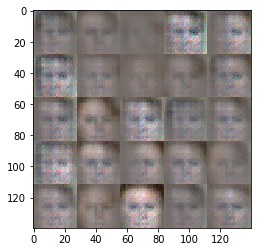

Epoch 0/1... Discriminator Loss: 0.8448... Generator Loss: 1.1662
Epoch 0/1... Discriminator Loss: 1.7499... Generator Loss: 0.2560
Epoch 0/1... Discriminator Loss: 0.7798... Generator Loss: 1.6564
Epoch 0/1... Discriminator Loss: 1.0706... Generator Loss: 1.4552
Epoch 0/1... Discriminator Loss: 1.1735... Generator Loss: 0.6428
Epoch 0/1... Discriminator Loss: 1.4413... Generator Loss: 0.7332
Epoch 0/1... Discriminator Loss: 0.9330... Generator Loss: 0.9980
Epoch 0/1... Discriminator Loss: 1.0222... Generator Loss: 0.9807
Epoch 0/1... Discriminator Loss: 1.2333... Generator Loss: 0.6762
Epoch 0/1... Discriminator Loss: 0.9627... Generator Loss: 1.4314


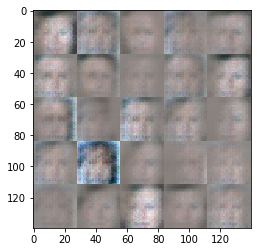

Epoch 0/1... Discriminator Loss: 1.1760... Generator Loss: 0.6733
Epoch 0/1... Discriminator Loss: 0.9252... Generator Loss: 1.7379
Epoch 0/1... Discriminator Loss: 0.4386... Generator Loss: 2.5943
Epoch 0/1... Discriminator Loss: 1.3781... Generator Loss: 1.3342
Epoch 0/1... Discriminator Loss: 1.5985... Generator Loss: 0.4824
Epoch 0/1... Discriminator Loss: 0.6738... Generator Loss: 1.2076
Epoch 0/1... Discriminator Loss: 0.7143... Generator Loss: 1.3766
Epoch 0/1... Discriminator Loss: 0.8606... Generator Loss: 2.4828
Epoch 0/1... Discriminator Loss: 1.2964... Generator Loss: 0.8301
Epoch 0/1... Discriminator Loss: 1.4110... Generator Loss: 3.5269


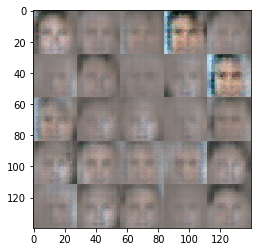

Epoch 0/1... Discriminator Loss: 0.9377... Generator Loss: 1.3086
Epoch 0/1... Discriminator Loss: 0.8638... Generator Loss: 0.9411
Epoch 0/1... Discriminator Loss: 0.9840... Generator Loss: 1.7727
Epoch 0/1... Discriminator Loss: 1.0872... Generator Loss: 1.5998
Epoch 0/1... Discriminator Loss: 1.0164... Generator Loss: 0.8524
Epoch 0/1... Discriminator Loss: 0.9213... Generator Loss: 0.9699
Epoch 0/1... Discriminator Loss: 0.8842... Generator Loss: 1.2843
Epoch 0/1... Discriminator Loss: 1.7075... Generator Loss: 2.5229
Epoch 0/1... Discriminator Loss: 0.6973... Generator Loss: 1.8241
Epoch 0/1... Discriminator Loss: 1.0305... Generator Loss: 0.8359


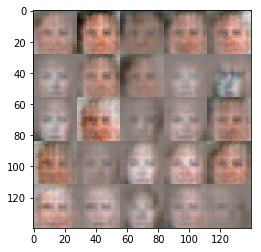

Epoch 0/1... Discriminator Loss: 0.9159... Generator Loss: 1.5733
Epoch 0/1... Discriminator Loss: 0.9017... Generator Loss: 1.3203
Epoch 0/1... Discriminator Loss: 0.7576... Generator Loss: 1.3191
Epoch 0/1... Discriminator Loss: 0.9750... Generator Loss: 0.8135
Epoch 0/1... Discriminator Loss: 1.4266... Generator Loss: 1.6478
Epoch 0/1... Discriminator Loss: 0.6673... Generator Loss: 1.2139
Epoch 0/1... Discriminator Loss: 1.4545... Generator Loss: 0.4239
Epoch 0/1... Discriminator Loss: 0.9865... Generator Loss: 1.3549
Epoch 0/1... Discriminator Loss: 1.0887... Generator Loss: 1.7775
Epoch 0/1... Discriminator Loss: 0.9860... Generator Loss: 1.6803


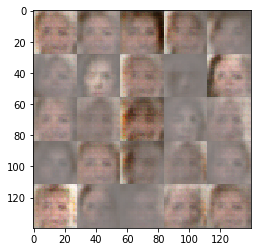

Epoch 0/1... Discriminator Loss: 0.8863... Generator Loss: 1.1132
Epoch 0/1... Discriminator Loss: 0.8982... Generator Loss: 0.9326
Epoch 0/1... Discriminator Loss: 1.0640... Generator Loss: 1.1399
Epoch 0/1... Discriminator Loss: 1.1338... Generator Loss: 0.7197
Epoch 0/1... Discriminator Loss: 0.7840... Generator Loss: 1.5072
Epoch 0/1... Discriminator Loss: 1.1094... Generator Loss: 0.7093
Epoch 0/1... Discriminator Loss: 1.1403... Generator Loss: 0.6104
Epoch 0/1... Discriminator Loss: 1.0848... Generator Loss: 0.8796
Epoch 0/1... Discriminator Loss: 1.0211... Generator Loss: 2.1367
Epoch 0/1... Discriminator Loss: 0.8646... Generator Loss: 1.0270


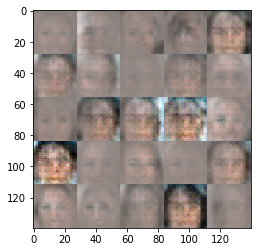

Epoch 0/1... Discriminator Loss: 0.8658... Generator Loss: 1.2062
Epoch 0/1... Discriminator Loss: 1.0802... Generator Loss: 0.7308
Epoch 0/1... Discriminator Loss: 0.6140... Generator Loss: 1.6088
Epoch 0/1... Discriminator Loss: 1.4960... Generator Loss: 3.2721
Epoch 0/1... Discriminator Loss: 0.7310... Generator Loss: 1.1966
Epoch 0/1... Discriminator Loss: 0.8227... Generator Loss: 0.9421
Epoch 0/1... Discriminator Loss: 0.9871... Generator Loss: 2.1352
Epoch 0/1... Discriminator Loss: 1.0784... Generator Loss: 0.9371
Epoch 0/1... Discriminator Loss: 0.7743... Generator Loss: 1.8152
Epoch 0/1... Discriminator Loss: 0.7698... Generator Loss: 1.9067


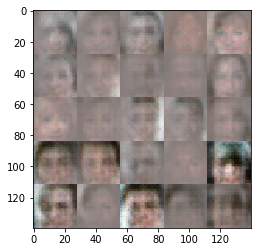

Epoch 0/1... Discriminator Loss: 0.9279... Generator Loss: 1.0380
Epoch 0/1... Discriminator Loss: 0.9590... Generator Loss: 1.0291
Epoch 0/1... Discriminator Loss: 0.8351... Generator Loss: 1.5593
Epoch 0/1... Discriminator Loss: 0.8710... Generator Loss: 1.2145
Epoch 0/1... Discriminator Loss: 1.1676... Generator Loss: 0.6458
Epoch 0/1... Discriminator Loss: 0.9822... Generator Loss: 1.3491
Epoch 0/1... Discriminator Loss: 0.8254... Generator Loss: 0.9854
Epoch 0/1... Discriminator Loss: 1.1236... Generator Loss: 1.0217
Epoch 0/1... Discriminator Loss: 1.0968... Generator Loss: 0.7212
Epoch 0/1... Discriminator Loss: 1.0197... Generator Loss: 0.7545


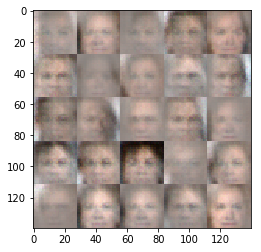

Epoch 0/1... Discriminator Loss: 1.0626... Generator Loss: 0.8434
Epoch 0/1... Discriminator Loss: 0.9550... Generator Loss: 1.5146
Epoch 0/1... Discriminator Loss: 0.6593... Generator Loss: 1.6805
Epoch 0/1... Discriminator Loss: 1.0012... Generator Loss: 0.7611
Epoch 0/1... Discriminator Loss: 1.3098... Generator Loss: 0.4967
Epoch 0/1... Discriminator Loss: 0.7955... Generator Loss: 1.6219
Epoch 0/1... Discriminator Loss: 0.7895... Generator Loss: 0.9534
Epoch 0/1... Discriminator Loss: 0.9110... Generator Loss: 0.9207
Epoch 0/1... Discriminator Loss: 1.5333... Generator Loss: 0.3853
Epoch 0/1... Discriminator Loss: 1.3128... Generator Loss: 0.6939


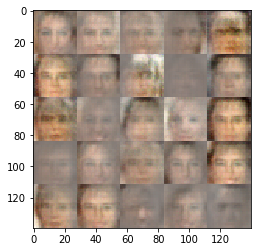

Epoch 0/1... Discriminator Loss: 1.2512... Generator Loss: 1.7992
Epoch 0/1... Discriminator Loss: 1.0646... Generator Loss: 0.8790
Epoch 0/1... Discriminator Loss: 1.2532... Generator Loss: 1.4148
Epoch 0/1... Discriminator Loss: 0.8213... Generator Loss: 1.8496
Epoch 0/1... Discriminator Loss: 1.0524... Generator Loss: 0.7517
Epoch 0/1... Discriminator Loss: 0.8038... Generator Loss: 1.9153
Epoch 0/1... Discriminator Loss: 1.0063... Generator Loss: 1.0961
Epoch 0/1... Discriminator Loss: 0.8308... Generator Loss: 1.1846
Epoch 0/1... Discriminator Loss: 0.7276... Generator Loss: 1.5962
Epoch 0/1... Discriminator Loss: 0.9459... Generator Loss: 2.3427


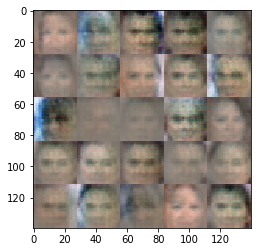

Epoch 0/1... Discriminator Loss: 1.0065... Generator Loss: 1.1707
Epoch 0/1... Discriminator Loss: 1.2103... Generator Loss: 0.7541
Epoch 0/1... Discriminator Loss: 1.0776... Generator Loss: 0.8089
Epoch 0/1... Discriminator Loss: 1.3316... Generator Loss: 2.3790
Epoch 0/1... Discriminator Loss: 0.9970... Generator Loss: 0.8046
Epoch 0/1... Discriminator Loss: 0.9279... Generator Loss: 0.9725
Epoch 0/1... Discriminator Loss: 1.1249... Generator Loss: 0.6978
Epoch 0/1... Discriminator Loss: 0.9384... Generator Loss: 0.8636
Epoch 0/1... Discriminator Loss: 0.8175... Generator Loss: 2.7957
Epoch 0/1... Discriminator Loss: 0.7945... Generator Loss: 1.4931


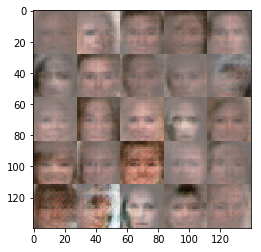

Epoch 0/1... Discriminator Loss: 1.1988... Generator Loss: 0.5470
Epoch 0/1... Discriminator Loss: 0.9128... Generator Loss: 0.9758
Epoch 0/1... Discriminator Loss: 0.8353... Generator Loss: 1.0927
Epoch 0/1... Discriminator Loss: 0.8728... Generator Loss: 1.2825
Epoch 0/1... Discriminator Loss: 1.1118... Generator Loss: 2.0509
Epoch 0/1... Discriminator Loss: 0.9033... Generator Loss: 1.0029
Epoch 0/1... Discriminator Loss: 1.0337... Generator Loss: 1.1374
Epoch 0/1... Discriminator Loss: 1.2666... Generator Loss: 0.5267
Epoch 0/1... Discriminator Loss: 0.8228... Generator Loss: 1.7268
Epoch 0/1... Discriminator Loss: 0.9053... Generator Loss: 1.0981


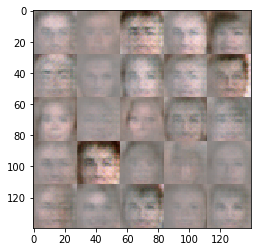

Epoch 0/1... Discriminator Loss: 0.7494... Generator Loss: 1.1583
Epoch 0/1... Discriminator Loss: 0.7964... Generator Loss: 1.1510
Epoch 0/1... Discriminator Loss: 1.0421... Generator Loss: 1.1807
Epoch 0/1... Discriminator Loss: 0.9859... Generator Loss: 0.9179
Epoch 0/1... Discriminator Loss: 0.8528... Generator Loss: 1.0294
Epoch 0/1... Discriminator Loss: 0.9494... Generator Loss: 0.8297
Epoch 0/1... Discriminator Loss: 1.7237... Generator Loss: 0.2750
Epoch 0/1... Discriminator Loss: 1.0771... Generator Loss: 1.2280
Epoch 0/1... Discriminator Loss: 0.8930... Generator Loss: 1.3774
Epoch 0/1... Discriminator Loss: 1.1878... Generator Loss: 1.9889


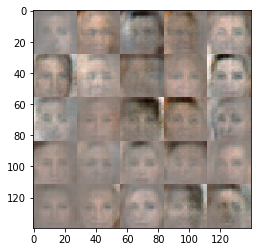

Epoch 0/1... Discriminator Loss: 1.4088... Generator Loss: 0.4842
Epoch 0/1... Discriminator Loss: 1.2562... Generator Loss: 0.9682
Epoch 0/1... Discriminator Loss: 0.9051... Generator Loss: 1.0417
Epoch 0/1... Discriminator Loss: 1.0305... Generator Loss: 1.0229
Epoch 0/1... Discriminator Loss: 0.9068... Generator Loss: 1.0011
Epoch 0/1... Discriminator Loss: 1.1234... Generator Loss: 1.7844
Epoch 0/1... Discriminator Loss: 1.0605... Generator Loss: 0.6096
Epoch 0/1... Discriminator Loss: 0.6986... Generator Loss: 1.5679
Epoch 0/1... Discriminator Loss: 1.0043... Generator Loss: 1.2898
Epoch 0/1... Discriminator Loss: 1.1507... Generator Loss: 0.7472


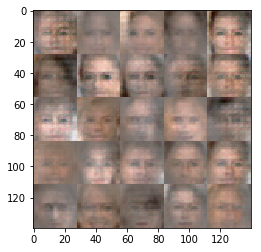

Epoch 0/1... Discriminator Loss: 0.9588... Generator Loss: 0.9766
Epoch 0/1... Discriminator Loss: 1.0741... Generator Loss: 0.7909


KeyboardInterrupt: 

In [31]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.